# Pandas

In [1]:
# import
import numpy as np
import pandas as pd

### Series

In [2]:
ls = [1,2,3,4,5]
ts = pd.Series(ls)
ts

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [5]:
ts = pd.Series(ls, index=['a', 'b', 'c', 'd', 'e'])
ts

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [11]:
# indexing
print(ts['b'])
print('-'*20)

# indexing으로 값 설정
ts['e'] = 10
print(ts)
print('-'*20)

# boolean indexing
print(ts[ts>3])
print('-'*20)

# broad casting
print(ts*2)

2
--------------------
a     1
b     2
c     3
d     4
e    10
dtype: int64
--------------------
d     4
e    10
dtype: int64
--------------------
a     2
b     4
c     6
d     8
e    20
dtype: int64


In [14]:
print(ts.index)
print(ts.values)
# index재설정하기
ts.index = ['가', '나', '다', '라', '마']
print(ts)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
[ 1  2  3  4 10]
가     1
나     2
다     3
라     4
마    10
dtype: int64


### DataFrame

In [173]:
raw_data = {'first_name': ['Jason', np.nan, 'tina', 'jake', 'amy'],
           'last_name':['miller', np.nan, 'ali', 'miler', 'coozer'],
           'age': [42, np.nan, 36, 24, 73],
           'sex':['m', np.nan, 'f', 'm', 'f'],
           'pretestscore':[4,np.nan,np.nan,2,3],
           'posttestscore':[25, np.nan, np.nan, 62, 70]}

df = pd.DataFrame(raw_data)
df

,first_name,last_name,age,sex,pretestscore,posttestscore
0,Jason,miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,tina,ali,36.0,f,NaN,NaN
3,jake,miler,24.0,m,2.0,62.0
4,amy,coozer,73.0,f,3.0,70.0


In [174]:
df1 = pd.DataFrame(raw_data, columns=['first_name', 'last_name'])
df1

,first_name,last_name
0,Jason,miller
1,NaN,NaN
2,tina,ali
3,jake,miler
4,amy,coozer


In [175]:
print(df.columns)
print(list(df.index))
df1.columns = ['fn', 'ln']
df1

Index(['first_name', 'last_name', 'age', 'sex', 'pretestscore',
       'posttestscore'],
      dtype='object')
[0, 1, 2, 3, 4]


,fn,ln
0,Jason,miller
1,NaN,NaN
2,tina,ali
3,jake,miler
4,amy,coozer


In [176]:
print(df['age'])
print(df['last_name'])
print(df[['first_name','last_name']])

0    42.0
1     NaN
2    36.0
3    24.0
4    73.0
Name: age, dtype: float64
0    miller
1       NaN
2       ali
3     miler
4    coozer
Name: last_name, dtype: object
  first_name last_name
0      Jason    miller
1        NaN       NaN
2       tina       ali
3       jake     miler
4        amy    coozer


In [177]:
# dataframe의 인덱스를 이용하는 방법과 속성을 이용하는 방법
print(df['sex'])

# 속성 사용의 제약사앙: 삽입, 공백있는 컬럼명
print(df.first_name)

0      m
1    NaN
2      f
3      m
4      f
Name: sex, dtype: object
0    Jason
1      NaN
2     tina
3     jake
4      amy
Name: first_name, dtype: object


In [178]:
df.index = ['a', 'b', 'c', 'd', 'e']

# row접근하기
print(df.loc['a']) #Series타입
print('-'*25)
print(df.iloc[0])
print('-'*25)
print(df.iloc[-1])
print('-'*25)
print(df.iloc[[-1,1]])
print('-'*25)
print(df.loc['a', 'last_name'])
print('-'*25)
print(df.loc['a', ['last_name', 'first_name']])
print('-'*25)
print(df.iloc[[0,1]])
print('-'*25)
print(df.loc['a':'c','last_name':'sex']) # 끝 인덱스 포함
print('-'*25)
print(df.iloc[0:3,1:4]) #끝인덱스 제외(파이썬 일반 문법과 같다)
print('-'*25)
# 타입은 시리즈
print(type(df.loc['a']))
print(type(df.iloc[-1]))
# 둘 이상의 row를 가져올 때의 타입은 DataFrame
print(type(df.loc[['a', 'd']]))

first_name        Jason
last_name        miller
age                  42
sex                   m
pretestscore          4
posttestscore        25
Name: a, dtype: object
-------------------------
first_name        Jason
last_name        miller
age                  42
sex                   m
pretestscore          4
posttestscore        25
Name: a, dtype: object
-------------------------
first_name          amy
last_name        coozer
age                  73
sex                   f
pretestscore          3
posttestscore        70
Name: e, dtype: object
-------------------------
  first_name last_name   age  sex  pretestscore  posttestscore
e        amy    coozer  73.0    f           3.0           70.0
b        NaN       NaN   NaN  NaN           NaN            NaN
-------------------------
miller
-------------------------
last_name     miller
first_name     Jason
Name: a, dtype: object
-------------------------
  first_name last_name   age  sex  pretestscore  posttestscore
a      Jason    mil

In [179]:
# df에서 row는 'c'~'e', column은 'sex'~'posttestscore'를 출력하기
print(df.loc['c':, 'sex':])
print(df.iloc[2:, 3:])
# ali, miler, nan, 2.0을 출력하기
print(df.iloc[2:4, [1,4]])
print(df.iloc[2:4, 1::3])

  sex  pretestscore  posttestscore
c   f           NaN            NaN
d   m           2.0           62.0
e   f           3.0           70.0
  sex  pretestscore  posttestscore
c   f           NaN            NaN
d   m           2.0           62.0
e   f           3.0           70.0
  last_name  pretestscore
c       ali           NaN
d     miler           2.0
  last_name  pretestscore
c       ali           NaN
d     miler           2.0


In [180]:
# age가 40이상인 데이터를 추출하기
print(df[df.age>40])
print(df[df['age']>40])
print(df[df.age>40]['last_name'].values.tolist())

  first_name last_name   age sex  pretestscore  posttestscore
a      Jason    miller  42.0   m           4.0           25.0
e        amy    coozer  73.0   f           3.0           70.0
  first_name last_name   age sex  pretestscore  posttestscore
a      Jason    miller  42.0   m           4.0           25.0
e        amy    coozer  73.0   f           3.0           70.0
['miller', 'coozer']


In [181]:
### jason의 pretestscore는 얼마인가
print(df[df.first_name=='Jason']['pretestscore'])
print(df[df['first_name']=='Jason']['pretestscore'])
print(df[df.first_name=='Jason']['pretestscore'].values)

a    4.0
Name: pretestscore, dtype: float64
a    4.0
Name: pretestscore, dtype: float64
[4.]


In [182]:
### 여성의 평균나이
print(np.mean(df[df.sex=='f'].age))
print(np.mean(df[df['sex']=='f']['age']))
# pandas데이터는 numpy함수를 바로 사용할 수 있다
print(df[df.sex=='f']['age'].mean())

54.5
54.5
54.5


In [183]:
### 최고령자의 이름 출력
print(df[df['age']==max(df.age)][['first_name','last_name']])
print(df[df.age==max(df.age)].first_name)

  first_name last_name
e        amy    coozer
e    amy
Name: first_name, dtype: object


### Column추가

In [184]:
df['addr']=['Seoul', 'Incheon', 'Gwangju', 'Pusan', 'Seoul']

In [185]:
df['age']=[42,25,78,41,23]

In [186]:
df.iloc[1,3] = 'f'

In [235]:
# column명 변경 함수 rename
df.rename(columns={'one':'o','two':'t'}, inplace=True)
#return해줌
df

,o,t,three,four,five
a,0.666291,0.944198,0.691329,0.724165,0.224716
b,0.722328,NaN,0.076171,0.681876,0.732880
c,0.167351,NaN,NaN,NaN,0.292315
d,0.026953,0.293724,0.665255,0.337151,0.615927
e,0.582858,0.107225,0.113393,0.576195,0.169406


In [236]:
#columns를 이용한 column명 변경 즉각적으로 값이 변경된다
df.columns = ['fn','ln','age','sex','pre','post','addr']
df
# rename과 비교
#df.rename(columns={'first_name': 'fn', 'last_name': 'ln'})

ValueError: Length mismatch: Expected axis has 5 elements, new values have 7 elements

In [189]:
df.drop('addr', axis=1, inplace=True)
df


,fn,ln,age,sex,pre,post
a,Jason,miller,42,m,4.0,25.0
b,NaN,NaN,25,f,NaN,NaN
c,tina,ali,78,f,NaN,NaN
d,jake,miler,41,m,2.0,62.0
e,amy,coozer,23,f,3.0,70.0


In [190]:
df.drop('b', inplace=True)
df

,fn,ln,age,sex,pre,post
a,Jason,miller,42,m,4.0,25.0
c,tina,ali,78,f,NaN,NaN
d,jake,miler,41,m,2.0,62.0
e,amy,coozer,23,f,3.0,70.0


In [114]:
df1

,fn,ln
0,Jason,miller
1,NaN,NaN
2,tina,ali
3,jake,miler
4,amy,coozer


In [191]:
df.to_csv('test.csv')

In [192]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 7096-B02E

 C:\04Python 디렉터리

2020-01-21  오후 04:16    <DIR>          .
2020-01-21  오후 04:16    <DIR>          ..
2020-01-21  오후 02:15    <DIR>          .ipynb_checkpoints
2020-01-16  오후 04:08            50,406 access_log
2020-01-16  오전 09:35         2,317,454 age.csv
2020-01-10  오후 03:04                22 ban.txt
2020-01-10  오후 03:04                93 ban_student.txt
2020-01-15  오후 02:05             1,871 birth_by_years.csv
2020-01-15  오후 02:20             3,969 birth_by_years1.csv
2020-01-15  오후 03:16    <DIR>          CSV
2020-01-15  오후 03:16            18,944 csv_files.selection.tar
2020-01-17  오전 09:14                32 data.pickle
2020-01-14  오후 03:19        24,307,200 data.selection.tar
2020-01-16  오후 03:18            18,231 Day01BasicDataform.ipynb
2020-01-16  오후 03:18            11,981 Day01List.ipynb
2020-01-08  오후 05:36            10,867 Day01Summary.ipynb
2020-01-16  오후 03:19             7,667 Day01summary2.ipynb
2020-01-16  오후 03:18       

In [194]:
fd = pd.read_csv('test.csv',index_col=0)
fd

,fn,ln,age,sex,pre,post
a,Jason,miller,42,m,4.0,25.0
c,tina,ali,78,f,NaN,NaN
d,jake,miler,41,m,2.0,62.0
e,amy,coozer,23,f,3.0,70.0


### 결측치 처리

In [202]:
# null값 처리 (삭제/대체)

# df만들기
df = pd.DataFrame(np.random.rand(5,5), columns = ['one', 'two', 'three', 'four', 'five'], index=['a', 'b', 'c','d','e'])
df

,one,two,three,four,five
a,0.666291,0.944198,0.691329,0.724165,0.224716
b,0.722328,0.889167,0.076171,0.681876,0.732880
c,0.167351,0.297014,0.002930,0.993480,0.292315
d,0.026953,0.293724,0.665255,0.337151,0.615927
e,0.582858,0.107225,0.113393,0.576195,0.169406


In [203]:
#nan값으로 덮기
df.iloc[1:3, 1] = np.nan
df.iloc[2, 2:4] = np.nan
df

,one,two,three,four,five
a,0.666291,0.944198,0.691329,0.724165,0.224716
b,0.722328,NaN,0.076171,0.681876,0.732880
c,0.167351,NaN,NaN,NaN,0.292315
d,0.026953,0.293724,0.665255,0.337151,0.615927
e,0.582858,0.107225,0.113393,0.576195,0.169406


In [225]:
df.isnull()
#df.isnull().sum(axis=0) column기준
#df.isnull().sum(axis=1) row기준
# 1. null값 있느 행이나 컬럼을 삭제하기 dropna()
df.dropna()#axis=0 row기준/ axis=1 column기준
df.dropna(how='all') #전부 nan인 데이터 삭제
df.dropna(how='any') # 하나라도 nan인 데이터 삭제
df.dropna(thresh=3) # 3개 미만의 nan이 아닌 데이터를 가지고 있으면 삭제


# 2. null값을 다른 값으로 대체하기 fillna()
df.fillna(0)
df.fillna(0.3)
# 바로 앞값으로 채워줌
df.fillna(method='ffill')
# 바로 뒷값으로 채워줌
df.fillna(method='bfill')
df.fillna(df.mean())

,one,two,three,four,five
a,0.666291,0.944198,0.691329,0.724165,0.224716
b,0.722328,0.448382,0.076171,0.681876,0.732880
c,0.167351,0.448382,0.386537,0.579847,0.292315
d,0.026953,0.293724,0.665255,0.337151,0.615927
e,0.582858,0.107225,0.113393,0.576195,0.169406


# Advanced Pandas
### GroupBy


참고     
corr()   
srt.contains()   
value_counts()   
sort_values()   

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings', 'Giants', 'Kings', 'Kings', 'Riders', 
                 'Royals', 'Royals', 'Riders'],
       'Rank':[1,2,2,3,3,4,1,1,2,4,1,2],
       'Year':[2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
       'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
data

{'Team': ['Riders',
  'Riders',
  'Devils',
  'Devils',
  'Kings',
  'Giants',
  'Kings',
  'Kings',
  'Riders',
  'Royals',
  'Royals',
  'Riders'],
 'Rank': [1, 2, 2, 3, 3, 4, 1, 1, 2, 4, 1, 2],
 'Year': [2014,
  2015,
  2014,
  2015,
  2014,
  2015,
  2016,
  2017,
  2016,
  2014,
  2015,
  2017],
 'Points': [876, 789, 863, 673, 741, 812, 756, 788, 694, 701, 804, 690]}

In [19]:
# 데이터 각 column 크기 확인
for i in data:
    print(len(data[i]))

12
12
12
12


In [20]:
df = pd.DataFrame(data)
df 
# 같은 팀의 데이터끼리 비교

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Giants,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [21]:
# GroupBy를 안쓰고 팀끼리 계산하기
S = set(df.Team)
for t in S:
    print(t,df[df.Team==t].Points.mean())

print(df[df.Team=='Devils'].Points.mean())
print(df[df.Team=='Devils'].Points.count())

Kings 761.6666666666666
Riders 762.25
Devils 768.0
Giants 812.0
Royals 752.5
768.0
2


GroupBy => 동일한 데이터끼리 데이터를 묶는다.

In [22]:
df.groupby('Team')['Points'].mean()
df.groupby('Team').Points.mean() #둘다가능

Team
Devils    768.000000
Giants    812.000000
Kings     761.666667
Riders    762.250000
Royals    752.500000
Name: Points, dtype: float64

In [26]:
gpdf = df.groupby('Team')
print(gpdf.get_group('Giants'))
print(gpdf.get_group('Riders'))

print(gpdf.agg({'Points':np.mean, 'Year':np.sum}))
print(gpdf.agg({'Rank':lambda x:str(len(x))+'등'}))

     Team  Rank  Year  Points
5  Giants     4  2015     812
      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
8   Riders     2  2016     694
11  Riders     2  2017     690
            Points  Year
Team                    
Devils  768.000000  4029
Giants  812.000000  2015
Kings   761.666667  6047
Riders  762.250000  8062
Royals  752.500000  4029
       Rank
Team       
Devils   2등
Giants   1등
Kings    3등
Riders   4등
Royals   2등


In [46]:
# 팀별로 몇개씩 데이터가 있는가
print(df.groupby('Team').Rank.count())
# 팀별로 가장 좋은 랭킹은
print(df.groupby('Team').Rank.min())

gpdf = df.groupby('Team')
print('*'*30)
print(gpdf.agg({'Year':len, 'Rank':min}))

Team
Devils    2
Giants    1
Kings     3
Riders    4
Royals    2
Name: Rank, dtype: int64
Team
Devils    2
Giants    4
Kings     1
Riders    1
Royals    1
Name: Rank, dtype: int64
******************************
        Year  Rank
Team              
Devils     2     2
Giants     1     4
Kings      3     1
Riders     4     1
Royals     2     1


In [53]:
# Phone_Data.csv
df = pd.read_csv('./D11/phone_data.csv')
df

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile
827,827,13/03/15 06:58,34.429,data,2015-03,data,data
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 7 columns):
index           830 non-null int64
date            830 non-null object
duration        830 non-null float64
item            830 non-null object
month           830 non-null object
network         830 non-null object
network_type    830 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 45.5+ KB


In [55]:
df.describe()

,index,duration
count,830.000000,830.000000
mean,414.500000,117.804036
std,239.744656,444.129560
min,0.000000,1.000000
25%,207.250000,1.000000
50%,414.500000,24.500000
75%,621.750000,55.000000
max,829.000000,10528.000000


In [59]:
df.head(10) #default는 5

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile
5,5,15/10/14 18:55,4.000,call,2014-11,Tesco,mobile
6,6,16/10/14 06:58,34.429,data,2014-11,data,data
7,7,16/10/14 15:01,602.000,call,2014-11,Three,mobile
8,8,16/10/14 15:12,1050.000,call,2014-11,Three,mobile
9,9,16/10/14 15:30,19.000,call,2014-11,voicemail,voicemail


In [57]:
df.tail(10) #default는 5

,index,date,duration,item,month,network,network_type
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile
827,827,13/03/15 06:58,34.429,data,2015-03,data,data
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world
829,829,14/03/15 00:16,1.000,sms,2015-03,world,world


In [61]:
df['item'].unique()

array(['data', 'call', 'sms'], dtype=object)

In [77]:
# 아이템별 사용시간의 평균
print(df.groupby('item').duration.mean())
# 합계
print(df.groupby('item').duration.sum())

item
call    237.940722
data     34.429000
sms       1.000000
Name: duration, dtype: float64
item
call    92321.00
data     5164.35
sms       292.00
Name: duration, dtype: float64


In [79]:
# call data 의 월별 사용시간 합계
print('<월별 [call] 누적시간>\n',df[df.item=='call'].groupby('month').duration.sum())
print('<월별 [data] 누적시간>\n',df[df.item=='data'].groupby('month').duration.sum())

<월별 [call] 누적시간
> month
2014-11    25547.0
2014-12    13561.0
2015-01    17070.0
2015-02    14416.0
2015-03    21727.0
Name: duration, dtype: float64
<월별 [data] 누적시간
> month
2014-11     998.441
2014-12    1032.870
2015-01    1067.299
2015-02    1067.299
2015-03     998.441
Name: duration, dtype: float64


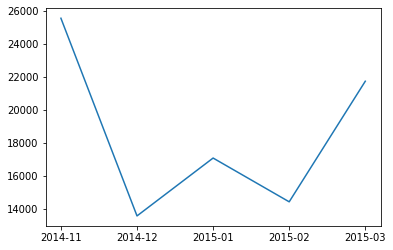

In [80]:
cperm = df[df.item=='call'].groupby('month').duration.sum()
dperm = df[df.item=='data'].groupby('month').duration.sum()
plt.plot(cperm)

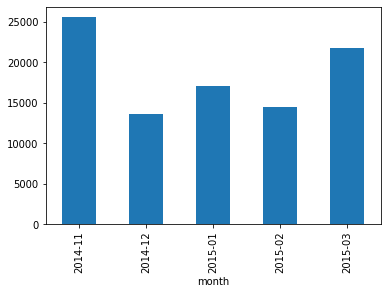

In [85]:
cperm.plot(kind='bar')

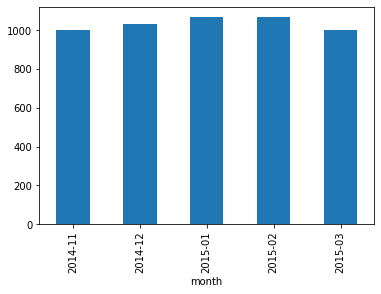

In [83]:
dperm.plot(kind='bar')

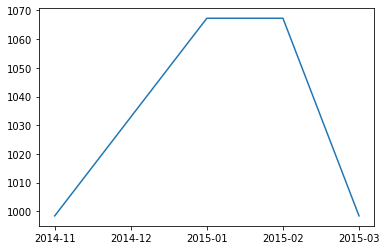

In [84]:
plt.plot(dperm)

In [87]:
df

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile
827,827,13/03/15 06:58,34.429,data,2015-03,data,data
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world


In [124]:
#통신사별 이용건수
print(df.groupby('network').item.count())
# 시간대별 이용건수
#df.date[0].split()[1][:2]

Temp = []
for d in df.date:
    Temp.append(d.split()[1][:2])
print(Temp)
df['hour'] = Temp
df.head()
iperh = df.groupby('hour').item.count()
# 시간대별 평균 이용시간
dperh = df.groupby('hour').duration.mean()
df[df.hour=='06'].item

network
Meteor        87
Tesco         84
Three        215
Vodafone     215
data         150
landline      42
special        3
voicemail     27
world          7
Name: item, dtype: int64
['06', '06', '14', '14', '17', '18', '06', '15', '15', '15', '16', '22', '22', '06', '10', '11', '11', '17', '17', '17', '17', '17', '17', '17', '17', '17', '06', '11', '12', '12', '13', '13', '14', '18', '20', '21', '21', '21', '22', '06', '14', '15', '16', '16', '20', '06', '09', '09', '13', '13', '18', '18', '19', '20', '06', '16', '06', '12', '06', '08', '09', '10', '10', '11', '11', '17', '06', '13', '13', '13', '13', '13', '13', '13', '13', '14', '14', '18', '18', '18', '06', '06', '14', '21', '21', '21', '01', '06', '11', '16', '19', '19', '06', '16', '20', '06', '12', '06', '14', '19', '20', '06', '07', '08', '13', '13', '14', '18', '18', '18', '18', '06', '15', '17', '06', '14', '15', '19', '21', '22', '06', '08', '10', '10', '10', '14', '15', '16', '16', '17', '22', '06', '11', '11', '13', '14

0      data
1      call
6      data
13     data
26     data
       ... 
821    data
822    data
823    data
824    data
827    data
Name: item, Length: 151, dtype: object

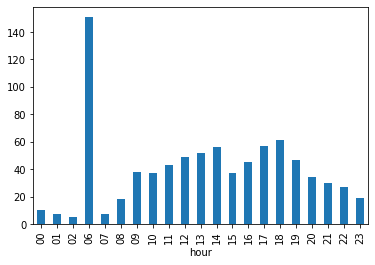

In [112]:
iperh.plot(kind='bar')

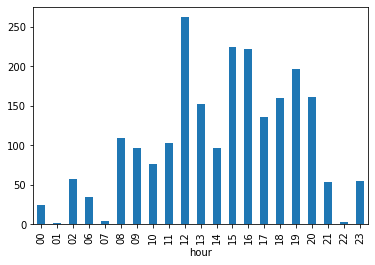

In [113]:
dperh.plot(kind='bar')

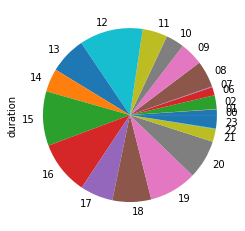

In [130]:
dperh.plot(kind='pie')

plt.savefig('frequencytime.jpg')

In [134]:
# month별로 사용시간의 sum을 구하면
print(df.groupby('month').duration.sum())

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64


### multi group by

In [143]:
# 월별 아이템별 사용시간 multi gruopby Hir
print(df.groupby(['month', 'item']).duration.sum())
print(df.groupby(['hour', 'item']).date.count())
# 아이텝별 월별 사용시간
print(df.groupby(['item', 'month']).duration.sum())
print(df.groupby(['item', 'month']).duration.sum().unstack())
print(type(df.groupby(['hour', 'month']).duration.sum()))
print(type(df.groupby(['hour', 'month']).duration.sum().unstack()))

month    item
2014-11  call    25547.000
         data      998.441
         sms        94.000
2014-12  call    13561.000
         data     1032.870
         sms        48.000
2015-01  call    17070.000
         data     1067.299
         sms        86.000
2015-02  call    14416.000
         data     1067.299
         sms        39.000
2015-03  call    21727.000
         data      998.441
         sms        25.000
Name: duration, dtype: float64
hour  item
00    call      4
      sms       6
01    call      1
      sms       6
02    call      4
      sms       1
06    call      1
      data    150
07    call      2
      sms       5
08    call      5
      sms      13
09    call     22
      sms      16
10    call     23
      sms      14
11    call     20
      sms      23
12    call     24
      sms      25
13    call     32
      sms      20
14    call     43
      sms      13
15    call     29
      sms       8
16    call     29
      sms      16
17    call     40
      sms      17

### apply()

In [157]:
df = pd.DataFrame({'a':[10,20,30],
                  'b':[20,30,40],
                  'c':[50,60,70]
                 })
df

,a,b,c
0,10,20,50
1,20,30,60
2,30,40,70


In [165]:
# df['a']컬럼을 10으로 나눈 정수값으로 바꾸고 싶다면

#df['a'] = (df['a']//10)
#df['a'] //= 10


def div10(x):
    return int(x/10)

print(df['a'].apply(div10))
# df의 'c'column을 5로 나눈 정수로 바꿔주기
def div5(x):
    return int(x/5)
print(df['c'].apply(div5))
df['c'] = df['c'].apply(div5)

0    1
1    2
2    3
Name: a, dtype: int64
0    10
1    12
2    14
Name: c, dtype: int64


In [166]:
# apply()와 lmabda함수 결합
# df['c']에 
print(df['c'].apply(lambda x: int(x/5)))
df['c'] = df['c'].apply(lambda x: int(x/5))

0    2
1    2
2    2
Name: c, dtype: int64


In [169]:
phone_df  = pd.read_csv('./D11/phone_data.csv')
phone_df

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile
827,827,13/03/15 06:58,34.429,data,2015-03,data,data
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world


In [171]:
# phone_df에서 'hour'컬럼에 시간대 삽입(apply사용)
phone_df['hour'] = phone_df['date'].apply(lambda x: x[9:11])
phone_df

,index,date,duration,item,month,network,network_type,hour
0,0,15/10/14 06:58,34.429,data,2014-11,data,data,06
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile,06
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile,14
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile,14
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile,17
...,...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world,00
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile,00
827,827,13/03/15 06:58,34.429,data,2015-03,data,data,06
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world,00


In [185]:
# 연도데이터를 year컬럼에 삽입하기
def monthf(x):
    return x.split('-')[0]
# phone_df['year']=phone_df.month.apply(monthf)
phone_df['year']=phone_df.month.apply(lambda d:d.split('-')[0])
phone_df

,index,date,duration,item,month,network,network_type,hour,year
0,0,15/10/14 06:58,34.4,data,2014-11,data,data,06,2014
1,1,15/10/14 06:58,13.0,call,2014-11,Vodafone,mobile,06,2014
2,2,15/10/14 14:46,23.0,call,2014-11,Meteor,mobile,14,2014
3,3,15/10/14 14:48,4.0,call,2014-11,Tesco,mobile,14,2014
4,4,15/10/14 17:27,4.0,call,2014-11,Tesco,mobile,17,2014
...,...,...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.0,sms,2015-03,world,world,00,2015
826,826,13/03/15 00:39,1.0,sms,2015-03,Vodafone,mobile,00,2015
827,827,13/03/15 06:58,34.4,data,2015-03,data,data,06,2015
828,828,14/03/15 00:13,1.0,sms,2015-03,world,world,00,2015


In [180]:
# duration값을 소숫점 첫째자리까지만
phone_df['duration'] = phone_df['duration'].apply(lambda x:round(x,1))
phone_df

,index,date,duration,item,month,network,network_type,hour,year
0,0,15/10/14 06:58,34.4,data,2014-11,data,data,06,14
1,1,15/10/14 06:58,13.0,call,2014-11,Vodafone,mobile,06,14
2,2,15/10/14 14:46,23.0,call,2014-11,Meteor,mobile,14,14
3,3,15/10/14 14:48,4.0,call,2014-11,Tesco,mobile,14,14
4,4,15/10/14 17:27,4.0,call,2014-11,Tesco,mobile,17,14
...,...,...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.0,sms,2015-03,world,world,00,15
826,826,13/03/15 00:39,1.0,sms,2015-03,Vodafone,mobile,00,15
827,827,13/03/15 06:58,34.4,data,2015-03,data,data,06,15
828,828,14/03/15 00:13,1.0,sms,2015-03,world,world,00,15


### DataFrame합치기
##### merge(join과 유사) : 구조가 상이할 경우 유용
##### concat(그냥 붙이기) :  구조가 일치할 경우 유용


In [198]:
raw_data = {
    'subject_id':[str(x) for x in range(1,13) if x!=6 ],
    'test_score':[51,15,15,61,16,14,15,61,16,51,16]
}
df1 = pd.DataFrame(raw_data)
print(df1)
raw_data2 = {
    'subject_id':['4','5','6','7','8'],
    'first_name':['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
    'last_name':['Bonder', 'Black', 'Balwner', 'Brice','Btisan']
}
df2 = pd.DataFrame(raw_data2)
print(df2)

   subject_id  test_score
0           1          51
1           2          15
2           3          15
3           4          61
4           5          16
5           7          14
6           8          15
7           9          61
8          10          16
9          11          51
10         12          16
  subject_id first_name last_name
0          4      Billy    Bonder
1          5      Brian     Black
2          6       Bran   Balwner
3          7      Bryce     Brice
4          8      Betty    Btisan


In [199]:
print(pd.merge(df1,df2, on='subject_id', how='inner')) #내부조인
print(pd.merge(df1,df2, on='subject_id', how='outer')) #외부조인
print(pd.merge(df1,df2, on='subject_id', how='left')) #좌측조인
print(pd.merge(df1,df2, on='subject_id', how='right')) #우측조인

  subject_id  test_score first_name last_name
0          4          61      Billy    Bonder
1          5          16      Brian     Black
2          7          14      Bryce     Brice
3          8          15      Betty    Btisan
   subject_id  test_score first_name last_name
0           1        51.0        NaN       NaN
1           2        15.0        NaN       NaN
2           3        15.0        NaN       NaN
3           4        61.0      Billy    Bonder
4           5        16.0      Brian     Black
5           7        14.0      Bryce     Brice
6           8        15.0      Betty    Btisan
7           9        61.0        NaN       NaN
8          10        16.0        NaN       NaN
9          11        51.0        NaN       NaN
10         12        16.0        NaN       NaN
11          6         NaN       Bran   Balwner
   subject_id  test_score first_name last_name
0           1          51        NaN       NaN
1           2          15        NaN       NaN
2           3     

In [208]:
print(pd.concat([df1,df2]))
print(pd.concat([df1,df2], axis=1))

   first_name last_name subject_id  test_score
0         NaN       NaN          1        51.0
1         NaN       NaN          2        15.0
2         NaN       NaN          3        15.0
3         NaN       NaN          4        61.0
4         NaN       NaN          5        16.0
5         NaN       NaN          7        14.0
6         NaN       NaN          8        15.0
7         NaN       NaN          9        61.0
8         NaN       NaN         10        16.0
9         NaN       NaN         11        51.0
10        NaN       NaN         12        16.0
0       Billy    Bonder          4         NaN
1       Brian     Black          5         NaN
2        Bran   Balwner          6         NaN
3       Bryce     Brice          7         NaN
4       Betty    Btisan          8         NaN
   subject_id  test_score subject_id first_name last_name
0           1          51          4      Billy    Bonder
1           2          15          5      Brian     Black
2           3          15  

C:\Users\103-04\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [1]:
L =[str(x) for x in range(1,13)]
L.remove('6')
print(L)
L = [str(x) for x in range(1,13) if x != 6]
print(L)

a = 3 if 5%2==0 else 4
a

['1', '2', '3', '4', '5', '7', '8', '9', '10', '11', '12']
['1', '2', '3', '4', '5', '7', '8', '9', '10', '11', '12']


4